In [1]:
from collections import deque
from IPython.display import Image

## 1. Suivant le graphe (Graphe_) définit précédemment, écrire les fonctions permettant de parcourir tous les nœuds de ce graphe, décrire ce que fait rellement votre fonction.

In [2]:
Graphe_ = { 
     'A':{'B':2, 'C':1}, 
     'B':{'A':2, 'C':2, 'D':1, 'E':3}, 
     'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5}, 
     'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5}, 
     'E':{'B':3, 'C':3, 'D':3, 'F':1}, 
     'F':{'C':5, 'D':6, 'E':1, 'G':2}, 
     'G':{'D':5, 'F':2} }

def profondeur(graph, node, visited=None):

    if visited is None:
        visited = []

    if node not in visited:
        visited.append(node)

    unvisited = [n for n in graph[node] if n not in visited]

    for node in unvisited:
        profondeur(graph, node, visited)

    return visited

print(profondeur(Graphe_, 'G'))

['G', 'D', 'B', 'A', 'C', 'E', 'F']


Cette fonction permet de parcourir chaque noeud, en prenant G comme point de
depart, elle demarre donc a la case G du dictionnaire, premier croisement nous
avons D:5, Nous allons donc au noeuf D, premier croisement B:1, => noeud A, dans
le noeud un nous avont B : 2 comme premier croisement, vu que c'est un noeud
deja visité, nous passons au deuxieme croisement qui est C, 
Dans le C nous avont les 3 premier croisement A, B, D qui sont deja visite donc
la fonction recupere le 4eme croisement qui est E qui n'a jamais été visite
il fait ca jusqua ce que tout les noeud ont été parcouru.


In [3]:
def largeur(graph, start):
 
    visited = []
    queue = deque()
    queue.append(start)
    lenlen = []

    while queue:
        node = queue.popleft()
        lenlen.append(node)
        
        if node not in visited:
            visited.append(node)
            unvisited = [n for n in graph[node] if n not in visited]
            queue.extend(unvisited)

    return lenlen

print(largeur(Graphe_, 'G'))


['G', 'D', 'F', 'B', 'C', 'E', 'F', 'C', 'E', 'A', 'C', 'E', 'A', 'E']


## 2.Trouver 2 manière de parcourir un graphe de A à G. Quelle est la longueur de votre parcour

In [4]:
print(profondeur(Graphe_, 'A'))
print(len(profondeur(Graphe_, 'A')))


print(largeur(Graphe_, 'A'))
print(len(largeur(Graphe_, 'A')))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
7
['A', 'B', 'C', 'C', 'D', 'E', 'D', 'E', 'F', 'E', 'F', 'G', 'F', 'G']
14


## 3. Utiliser l'algorhithme de dijkstra pour connaitre la plus courte distance entre un sommet et tout les autres

In [5]:
def moore_dijkstra_1(G, s):
    inf = sum(sum(G[sommet][i] for i in G[sommet]) for sommet in G) + 1
        #On considère comme "infini" un majorant de la somme de toutes les
        #pondérations du graphe
    s_explore = {s : [0, [s]]}
        #On associe au sommet d'origine s la liste [longueur, plus court chemin]
    s_a_explorer = {j : [inf, ""] for j in G if j != s}
        #On associe à chaque sommet j à explorer la liste [longueur, sommet précédent]
    for suivant in G[s]:
        s_a_explorer[suivant] = [G[s][suivant], s]

    print("Dans le graphe d\'origine {} dont les arcs sont :".format(s))
    for k in G:
        print(k, ":", G[k])
    print()
    print("Plus courts chemin de")

    #On créé une boucle qui tourne tant que la liste des sommets à explorer contient
    #des points tels que la longueur provisoire calculée depuis l'origine est
    #inférieure à l'infini
    while s_a_explorer and any(s_a_explorer[k][0] < inf for k in s_a_explorer):
        s_min = min(s_a_explorer, key = s_a_explorer.get)
        longueur_s_min, precedent_s_min = s_a_explorer[s_min]
        for successeur in G[s_min]:
            if successeur in s_a_explorer:
                dist = longueur_s_min + G[s_min][successeur]
                if dist < s_a_explorer[successeur][0]:
                    s_a_explorer[successeur] = [dist, s_min]
        s_explore[s_min] = [longueur_s_min, s_explore[precedent_s_min][1] + [s_min]]
        del s_a_explorer[s_min]
        print("longueur", longueur_s_min, ":", " -> ".join(s_explore[s_min][1]))

    for k in s_a_explorer:
        print("Il n\'y a aucun chemin de {} à {}".format(s, k))
    print()

    return s_explore

In [6]:
moore_dijkstra_1(Graphe_, 'A')

Dans le graphe d'origine A dont les arcs sont :
A : {'B': 2, 'C': 1}
B : {'A': 2, 'C': 2, 'D': 1, 'E': 3}
C : {'A': 1, 'B': 2, 'D': 4, 'E': 3, 'F': 5}
D : {'B': 1, 'C': 4, 'E': 3, 'F': 6, 'G': 5}
E : {'B': 3, 'C': 3, 'D': 3, 'F': 1}
F : {'C': 5, 'D': 6, 'E': 1, 'G': 2}
G : {'D': 5, 'F': 2}

Plus courts chemin de
longueur 1 : A -> C
longueur 2 : A -> B
longueur 3 : A -> B -> D
longueur 4 : A -> C -> E
longueur 5 : A -> C -> E -> F
longueur 7 : A -> C -> E -> F -> G



{'A': [0, ['A']],
 'C': [1, ['A', 'C']],
 'B': [2, ['A', 'B']],
 'D': [3, ['A', 'B', 'D']],
 'E': [4, ['A', 'C', 'E']],
 'F': [5, ['A', 'C', 'E', 'F']],
 'G': [7, ['A', 'C', 'E', 'F', 'G']]}

## 4. Je souhaite aller du point A au point B, je veux considérer qu'elle est la distance la plus courte pour aller d'un point à un notre en considérant les poids associés à chacun des nœuds. Donc je souhaite aller de A à G, lorsque je suis au point A, j'ai le choix de passer par B ou C, la distance au point C est plus petite, cependant ça ne nous garanti pas que la distance du point B au G soit plus grande. Les questions qu'on peut alors se poser sont les suivantes : doit-on évaluer tous les chemin possible et calculer leur distance (on somme les poids par exemple) pour en déduire quelle est la distance la plus petite. Ou doit-on systématiquement choisir l'arête possédant la pondération la plus faible comme étape suivante ?

In [7]:
def affiche_peres(pere,depart,extremite,trajet):
    if extremite == depart:
        return [depart] + trajet
    else:
        return (affiche_peres(pere, depart, pere[extremite], [extremite] + trajet))

def plus_court(graphe,etape,fin,visites,dist,pere,depart):
    if etape == fin:
       return dist[fin], affiche_peres(pere,depart,fin,[])
    if  len(visites) == 0 : dist[etape]=0
    for voisin in graphe[etape]:
        if voisin not in visites:
            dist_voisin = dist.get(voisin,float('inf'))
            candidat_dist = dist[etape] + graphe[etape][voisin]
            if candidat_dist < dist_voisin:
                dist[voisin] = candidat_dist
                pere[voisin] = etape
    visites.append(etape)
    non_visites = dict((s, dist.get(s,float('inf'))) for s in graphe if s not in visites)
    noeud_plus_proche = min(non_visites, key = non_visites.get)
    return plus_court(graphe,noeud_plus_proche,fin,visites,dist,pere,depart)
 
def dij_rec(graphe,debut,fin):
    return plus_court(graphe,debut,fin,[],{},{},debut)

In [8]:
dij_rec(Graphe_, 'A', 'G')

(7, ['A', 'C', 'E', 'F', 'G'])

## 5. Crée une class

In [9]:
class djiska:
    
    def __init__(self, graphe):
        self.graphe = graphe
        
    def plus_court(self, graphe, etape, fin,visites,dist,pere,depart):
        if etape == fin:
           return dist[fin], affiche_peres(pere,depart,fin,[])
        if  len(visites) == 0 : dist[etape]=0
        for voisin in graphe[etape]:
            if voisin not in visites:
                dist_voisin = dist.get(voisin,float('inf'))
                candidat_dist = dist[etape] + graphe[etape][voisin]
                if candidat_dist < dist_voisin:
                    dist[voisin] = candidat_dist
                    pere[voisin] = etape
        visites.append(etape)
        non_visites = dict((s, dist.get(s,float('inf'))) for s in graphe if s not in visites)
        noeud_plus_proche = min(non_visites, key = non_visites.get)
        return plus_court(graphe,noeud_plus_proche,fin,visites,dist,pere,depart)
    
    def dij_rec(self, graphe, debut, fin):
        return plus_court(graphe,debut,fin,[],{},{},debut)

In [10]:
a = djiska(Graphe_)

a.dij_rec(Graphe_, 'A', 'G')

(7, ['A', 'C', 'E', 'F', 'G'])

## 6. Création d'un labyrinth

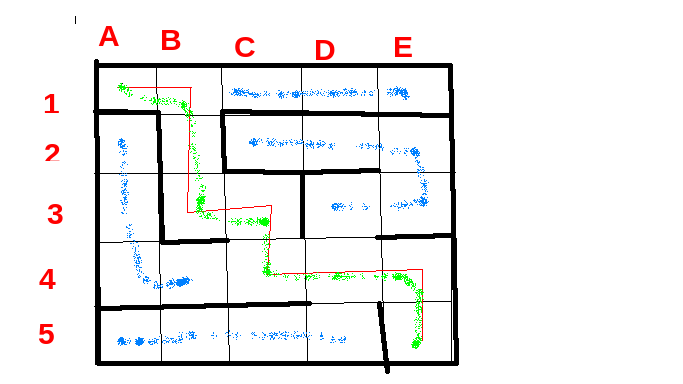

In [11]:
Image("img/laby2.png")

### Parcours en profondeur du labyrinth

In [12]:
Graphe_2 = { 
     'A1':['B1'], 
     'B1':['A1','C1','B2'],
     'C1':['B1', 'D1'],
     'D1':['C1', 'E1'],
     'E1':['D1'],
     'A2':['A3'],
     'B2':['B1', 'B3'],
     'C2':['D2'],
     'D2':['C2', 'E2'],
     'E2':['D2', 'E3'],
     'A3':['A2', 'A4'],
     'B3':['B2', 'C3'],
     'C3':['B3', 'C4'],
     'D3':['E3', 'D4'],
     'E3':['E2', 'D3'],
     'A4':['A3', 'B4'],
     'B4':['A4', 'C4'],
     'C4':['C3', 'B4', 'D4'],
     'D4':['C4', 'D3', 'E4', 'D5'],
     'E4':['D4', 'E5'],
     'A5':['B5'],
     'B5':['A5', 'C5'],
     'C5':['B5', 'D5'],
     'D5':['C5', 'D4'],
     'E5':['E4']}

Graphe_21 = {}

#CONVERTIR LISTE EN DICT
for k, v in Graphe_2.items():
    dict_temp = {}
    for i in v:
        dict_temp[i] = 1
    Graphe_21[k] = dict_temp   
    

print(profondeur(Graphe_21, 'A1'))

['A1', 'B1', 'C1', 'D1', 'E1', 'B2', 'B3', 'C3', 'C4', 'B4', 'A4', 'A3', 'A2', 'D4', 'D3', 'E3', 'E2', 'D2', 'C2', 'E4', 'E5', 'D5', 'C5', 'B5', 'A5']


### Parcours avec Djilkstra

In [13]:
d = djiska(Graphe_21)

print(Graphe_21)

d.dij_rec(Graphe_21, 'A1', 'E5')

{'A1': {'B1': 1}, 'B1': {'A1': 1, 'C1': 1, 'B2': 1}, 'C1': {'B1': 1, 'D1': 1}, 'D1': {'C1': 1, 'E1': 1}, 'E1': {'D1': 1}, 'A2': {'A3': 1}, 'B2': {'B1': 1, 'B3': 1}, 'C2': {'D2': 1}, 'D2': {'C2': 1, 'E2': 1}, 'E2': {'D2': 1, 'E3': 1}, 'A3': {'A2': 1, 'A4': 1}, 'B3': {'B2': 1, 'C3': 1}, 'C3': {'B3': 1, 'C4': 1}, 'D3': {'E3': 1, 'D4': 1}, 'E3': {'E2': 1, 'D3': 1}, 'A4': {'A3': 1, 'B4': 1}, 'B4': {'A4': 1, 'C4': 1}, 'C4': {'C3': 1, 'B4': 1, 'D4': 1}, 'D4': {'C4': 1, 'D3': 1, 'E4': 1, 'D5': 1}, 'E4': {'D4': 1, 'E5': 1}, 'A5': {'B5': 1}, 'B5': {'A5': 1, 'C5': 1}, 'C5': {'B5': 1, 'D5': 1}, 'D5': {'C5': 1, 'D4': 1}, 'E5': {'E4': 1}}


(8, ['A1', 'B1', 'B2', 'B3', 'C3', 'C4', 'D4', 'E4', 'E5'])

### 7. Génération d'un perfect labyrinth aléatoire + Parcours djikstra

In [14]:
from laby import *

._._._._._.
| . ._| . |
| | | ._| |
| |_._| | |
|_._._. | |
|_._._._|_|
Start Point   : (4,4)
End Point     : (0,3)

[[(0, 1), (0, 2)], [(3, 3), (2, 3)], [(3, 3), (2, 3)], [(3, 3), (2, 3)], [(4, 1), (4, 0)], [(4, 2), (4, 1)], [(4, 2), (4, 1)], [(4, 2), (4, 1)], [(4, 3), (4, 2)], [(4, 3), (4, 2)], [(4, 3), (4, 2)], [(3, 3), (2, 3), (4, 3)], [(3, 2), (3, 3)], [(3, 2), (3, 3)], [(3, 2), (3, 3)], [(3, 2), (3, 3)], [(3, 1), (3, 2)], [(3, 1), (3, 2)], [(3, 1), (3, 2)], [(3, 0), (3, 1)], [(3, 0), (3, 1)], [(3, 0), (3, 1)], [(2, 0), (3, 0)], [(2, 0), (3, 0)], [(1, 0), (2, 0)], [(0, 0), (1, 0)], [(0, 1), (0, 2), (0, 0)], [(1, 1), (0, 1)], [(1, 1), (0, 1)], [(1, 1), (0, 1)], [(2, 1), (1, 1)], [(2, 1), (1, 1)], [(2, 1), (1, 1)], [(2, 1), (1, 1)], [(2, 2), (2, 1)], [(2, 2), (2, 1)], [(2, 2), (2, 1)], [(1, 2), (2, 2)], [(1, 2), (2, 2)], [(1, 2), (2, 2)], [(1, 2), (2, 2)], [(1, 3), (1, 2)], [(1, 3), (1, 2)], [(1, 3), (1, 2)], [(1, 3), (1, 2)], [(0, 3), (1, 3)], [(0, 3), (1, 3)], [(0, 4), (0, 3)], [(

Voir laby.py pour le code

In [15]:
a = Maze(5,5)
print(a)

print("Chemin le plus court :")
b = Maze.solve_maze(a)
#Fonction trouvé qui n'utilise pas dikstra

._._._._._.
| . | ._. |
| | | | | |
|_|_._._| |
| ._._| . |
|_._._._|_|
Start Point   : (3,2)
End Point     : (2,3)

Chemin le plus court :
Path : [[3, 2], [3, 1], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [3, 3], [3, 4], [2, 4], [1, 4], [0, 4], [0, 3], [0, 2], [1, 2], [2, 2], [2, 3]]


### 8. solve with dikstra

In [16]:
#-----------------------------------------------------------
#
#
#            to keep
#
#
#-----------------------------------------------------------

"""

dico = {}


for i in DICTOFINAL:
    size = len(i)
    if i[0] not in dico.keys():
        dico[i[0]] = [i[1]]
    else:
        for n in range(1,size):
            if i[n] not in dico[i[0]]:
                dico[i[0]].append(i[n])

                
dico2 = dico.copy()
                
for k, v in dico.items():
    for i in v:
        if i not in dico.keys():
            dico2[i] = [k]
            
dico3 = dico2.copy()

for k,v in dico2.items():
    for k2, v2 in dico2.items():
        if k in v2 and k2 not in dico3[k]:
             dico3[k].append(k2)

dico4 = {}
for k, v in dico3.items():
    dict_temp = {}
    for i in v:
        dict_temp[i] = 1
    dico4[k] = dict_temp   

print(laby)
MyMaze.solver(laby)
DICTOFINAL
"""

'\n\ndico = {}\n\n\nfor i in DICTOFINAL:\n    size = len(i)\n    if i[0] not in dico.keys():\n        dico[i[0]] = [i[1]]\n    else:\n        for n in range(1,size):\n            if i[n] not in dico[i[0]]:\n                dico[i[0]].append(i[n])\n\n                \ndico2 = dico.copy()\n                \nfor k, v in dico.items():\n    for i in v:\n        if i not in dico.keys():\n            dico2[i] = [k]\n            \ndico3 = dico2.copy()\n\nfor k,v in dico2.items():\n    for k2, v2 in dico2.items():\n        if k in v2 and k2 not in dico3[k]:\n             dico3[k].append(k2)\n\ndico4 = {}\nfor k, v in dico3.items():\n    dict_temp = {}\n    for i in v:\n        dict_temp[i] = 1\n    dico4[k] = dict_temp   \n\nprint(laby)\nMyMaze.solver(laby)\nDICTOFINAL\n'

In [17]:
import random

BOTTOMWALL = 0
RIGHTWALL = 1
VISITED = 2
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
DICTOFINAL = []


class Maze:

  def __init__(self,rows,cols, dictofinal=[]):
    
    #INIT 
    self.rows = rows
    self.cols = cols
    
    #??????????
    self.maze = [[[True,True,False] for j in range(cols)] for i in range(rows)]
    
    #START POSITION
    self.startrow = random.randrange(rows)
    self.startcol = random.randrange(cols)
    
    #END POSITION
    self.endrow = random.randrange(rows)
    self.endcol = random.randrange(cols)
    
    #CURR POSITION
    currrow = self.startrow
    currcol = self.startcol

    #GENERATE MAZE WITH CURR POSITION
    self._gen_maze(currrow,currcol)

    #????????????????????????
    self.numtable = [[-1 for j in range(cols)]for i in range(rows)]

    #SOLUTION PATH INIT
    self.solutionpath = []

    
  #-----------------------------------------------------------------------------

  # RETURN ASCII MAZE GRAPHIQUE
  def __str__(self):

    # DEFINE UPPER ROWS
    laby = '.'+self.cols*'_.'+'\n'
    
    # BOUCLE OTHER ROWS
    for i in range(self.rows):
      laby += '|'
      
      # DEFINE WALL
      for j in range(self.cols):
        if self.maze[i][j][BOTTOMWALL]:
          laby += '_'
        else:
          laby += ' '
        if self.maze[i][j][RIGHTWALL]:
          laby += '|'
        else:
          laby += '.'

      laby += '\n'

    laby += 'Start Point   : ('+str(self.startrow)+','+str(self.startcol)+')\n'
    laby += 'End Point     : ('+str(self.endrow)+','+str(self.endcol)+')\n'

    return laby

  #------------------------------------------------------------------------------

  # get a list with posible directions from the current position
  def _get_dirs(self,r,c):
    dirlist = []

    # check limits
    if r-1 >= 0           : dirlist.append(UP)
    if r+1 <= self.rows-1 : dirlist.append(DOWN)
    if c-1 >= 0           : dirlist.append(LEFT)
    if c+1 <= self.cols-1 : dirlist.append(RIGHT)

    return dirlist

  #------------------------------------------------------------------------------

  # generates the maze with depth-first algorithm
  def _gen_maze(self,r,c,d=None):
    maze = self.maze
    # knock down the wall between actual and previous position
    maze[r][c][VISITED] = True
    if   d == UP    : maze[r]  [c]    [BOTTOMWALL] = False
    elif d == DOWN  : maze[r-1][c]    [BOTTOMWALL] = False
    elif d == RIGHT : maze[r]  [c-1]  [RIGHTWALL]  = False
    elif d == LEFT  : maze[r]  [c]    [RIGHTWALL]  = False

    # get the next no visited directions to move
    dirs = self._get_dirs(r,c)
    dicto = []
    # random reorder directions
    for i in range(len(dirs)):
      j = random.randrange(len(dirs))
      dirs[i],dirs[j] = dirs[j],dirs[i]
    
    # make recursive call if the target cell is not visited
    for d in dirs:
      if d==UP:
        if not maze[r-1][c][VISITED]:
          dicto.append((r,c))
          self._gen_maze( r-1,c,UP )
          dicto.append((r-1,c))
          
      elif d==DOWN:
        if not maze[r+1][c][VISITED]:
          dicto.append((r,c))
          self._gen_maze( r+1,c,DOWN )
          dicto.append((r+1,c)) 
          
      if d==RIGHT:  
        if not maze[r][c+1][VISITED]:
          dicto.append((r,c))
          self._gen_maze( r,c+1,RIGHT )
          dicto.append((r,c+1))   
      elif d==LEFT:
        if not maze[r][c-1][VISITED]:
          dicto.append((r,c))
          self._gen_maze( r,c-1,LEFT )
          dicto.append((r,c-1))
      if not dicto == []:
          dictemp=[]
          for i in dicto:
              if i not in dictemp:
                  dictemp.append(i)
          DICTOFINAL.append(dictemp)

        
 
a =Maze(5,5)
print(a)
dico = {}


for i in DICTOFINAL:
    size = len(i)
    if i[0] not in dico.keys():
        dico[i[0]] = [i[1]]
    else:
        for n in range(1,size):
            if i[n] not in dico[i[0]]:
                dico[i[0]].append(i[n])

                
dico2 = dico.copy()
                
for k, v in dico.items():
    for i in v:
        if i not in dico.keys():
            dico2[i] = [k]
            
dico3 = dico2.copy()

for k,v in dico2.items():
    for k2, v2 in dico2.items():
        if k in v2 and k2 not in dico3[k]:
             dico3[k].append(k2)

dico4 = {}
for k, v in dico3.items():
    dict_temp = {}
    for i in v:
        dict_temp[i] = 1
    dico4[k] = dict_temp   


._._._._._.
| . | . ._|
| |_| |_. |
|_._. ._| |
| ._|_| . |
|_._._._|_|
Start Point   : (3,1)
End Point     : (1,4)



In [18]:
a = (3,3)
b = (3,1)
dij_rec(dico4, a, b)

(6, [(3, 3), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (3, 1)])